# Delhi Metro – Data Cleaning & Exploration Python Project

## Importing Necessary Libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Let's load the dataset

In [98]:
file_path = r"C:\Users\Prerit\OneDrive\Desktop\Delhi-Metro-F\Delhi-Metro-Analysis-1\delhi_metro_raw.csv"
df = pd.read_csv(file_path)

## Now, It's time for KYD (Know Your Data) - Exploring data

# Exploratory Data Analysis (EDA)

In [99]:
df.head() # It returns first five rows from the dataset, we can also customize returning rows by passing numrical value

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
0,59771,2022-05-08,Inderlok,Kashmere Gate,12.94,77.99,18.27,13.0,Smart Card,maintenance
1,21363,2023-01-12,Model Town,Dilshad Garden,2.33,35.89,83.71,15.0,Tourist Card,maintenance
2,127325,2023-07-13,Kashmere Gate,Netaji Subhash Place,5.56,64.35,43.70,9.0,Single,off-peak
3,140510,2022-11-10,Chandni Chowk,Hauz Khas,4.02,144.13,14.98,27.0,NaN,maintenance
4,144298,2022-11-06,Rajiv Chowk,Kalkaji Mandir,9.66,104.96,83.84,23.0,Single,off-peak


In [100]:
df.tail() # It returns last five rows from the dataset, we can also customize returning rows by passing numrical value

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
149995,119880,2022-04-04,KIRTI NAGAR,AIIMS,5.13,100.48,20.33,28.0,Tourist Card,peak
149996,103695,2023-10-25,Model Town,Inderlok,0.64,86.31,111.27,21.0,Tourist Card,off-peak
149997,131933,2023-02-14,Noida City Centre,Shivaji Park,4.86,140.81,55.83,18.0,Smart Card,festival
149998,146868,2024-08-06,Barakhamba Road,Pragati Maidan,12.31,149.82,65.96,18.0,Single,weekend
149999,121959,2022-02-11,New Delhi,Central Secretariat,4.98,171.79,103.20,20.0,Single,NaN


In [101]:
#To check all the column names
df.columns

Index(['TripID', 'Date', 'From_Station', 'To_Station', 'Distance_km', 'Fare',
       'Cost_per_passenger', 'Passengers', 'Ticket_Type', 'Remarks'],
      dtype='object')

In [102]:
# To check the information about data, Null count, Non-Null count, Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TripID              150000 non-null  int64  
 1   Date                150000 non-null  object 
 2   From_Station        150000 non-null  object 
 3   To_Station          150000 non-null  object 
 4   Distance_km         150000 non-null  float64
 5   Fare                150000 non-null  float64
 6   Cost_per_passenger  150000 non-null  float64
 7   Passengers          148500 non-null  float64
 8   Ticket_Type         148500 non-null  object 
 9   Remarks             123743 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 11.4+ MB


In [103]:
# Descriptive Statistical Summary for Numerical Columns
df.describe()

,TripID,Distance_km,Fare,Cost_per_passenger,Passengers
count,150000.000000,150000.000000,150000.000000,150000.000000,148500.000000
mean,75000.500000,5.490446,105.116503,62.474807,20.003522
std,43301.414527,4.980333,54.879494,33.207161,4.468134
min,1.000000,0.500000,10.000000,5.000000,4.000000
25%,37500.750000,1.940000,57.570000,33.687500,17.000000
50%,75000.500000,3.960000,105.170000,62.520000,20.000000
75%,112500.250000,7.420000,152.572500,91.190000,23.000000
max,150000.000000,63.030000,200.000000,120.000000,41.000000


In [104]:
df.shape # It returns the total rows and columns from the dataset

(150000, 10)

In [105]:
df.nunique() # It returns the number of unique values present in each column

TripID                150000
Date                    1095
From_Station             663
To_Station                24
Distance_km             3149
Fare                   18996
Cost_per_passenger     11501
Passengers                38
Ticket_Type                4
Remarks                    5
dtype: int64

In [106]:
df.isnull().sum() # It returns the count of null values in each column

TripID                    0
Date                      0
From_Station              0
To_Station                0
Distance_km               0
Fare                      0
Cost_per_passenger        0
Passengers             1500
Ticket_Type            1500
Remarks               26257
dtype: int64

## Now we know all about the data, we know all the null values and data types
## Let's deal with null values and Clean the data
### The Columns with their null values and their data types. We assume dtype -> object  as String data type
Passengers          148500 - > non-null  float64
Ticket_Type         148500 - > non-null  object 
Remarks             123743 - > non-null  object 

In [107]:
# As i observed in the dataset, there were unusual whitespaces in the 'From_Station' column which leads to messy data
# Let's Clean the messy data 
df['From_Station'] = df['From_Station'].astype(str).str.rstrip() # converted columns data type to string for applying rstrip() method from string methods to remove whitespaces
df['From_Station'].sample(6) # checking if the messy 'From_Station' columns is cleaned or not

88202             Mandi House
45945                   AIIMS
21128             Kirti Nagar
60565             Mandi House
148299            Laxmi Nagar
140388    Central Secretariat
Name: From_Station, dtype: object

## Let's Check if all the data in all the columns are Messy or Aligned

In [108]:
df.sample(10) # everytime we run this cell, It will give random 10 records from the dataset

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks
12845,107643,2024-01-25,Punjabi Bagh,Old Delhi,2.19,107.23,107.07,16.0,Smart Card,weekend
49653,85692,2023-03-11,AIIMS,Netaji Subhash Place,2.83,90.95,106.19,24.0,Single,weekend
147228,1709,2023-11-10,Kashmere Gate,Central Secretariat,4.22,137.47,69.64,29.0,Return,festival
83664,71818,2024-10-22,Mandi House,Kalkaji Mandir,4.32,178.04,88.18,27.0,Single,festival
133081,10023,2024-09-22,Rajiv Chowk,Laxmi Nagar,3.22,68.80,55.09,21.0,Smart Card,peak
130179,12156,2022-11-19,Netaji Subhash Place,Hauz Khas,0.62,155.63,46.50,25.0,Tourist Card,off-peak
76302,25235,2024-10-30,Inderlok,Rajouri Garden,1.16,78.54,53.87,16.0,Smart Card,off-peak
68493,34313,2022-01-30,Rajouri Garden,Janakpuri West,7.17,177.80,22.76,21.0,Single,festival
94994,15146,2024-12-30,Kirti Nagar,Janakpuri West,11.69,81.96,54.39,10.0,Smart Card,off-peak
77842,76332,2023-11-30,Hauz Khas,Chandni Chowk,0.58,172.68,94.47,23.0,Return,peak


In [109]:
print(df["Ticket_Type"].value_counts())


Ticket_Type
Single          37341
Smart Card      37244
Return          37103
Tourist Card    36812
Name: count, dtype: int64


## As checked in the data, the categories in the 'Ticket_Type' column are Single, Smart card, Return and Tourist Card
I travel almost everyday in Delhi metro so i know that there is no ticket type like Return or Single. So let's change the ticket type into valid ticket type which makes more sense

## Changing thw wrong values like return to correct values like Tourist Card

In [110]:
mask1 = df["Ticket_Type"].astype(str).str.strip().str.lower() == "return"
df.loc[mask1, "Ticket_Type"] = "Tourist Card"

## But still 'tourist card' also does not matches the real world ticket type so again changing it to 'Token'

In [111]:
mask2 = df['Ticket_Type'].astype(str).str.strip().str.lower() == 'single'
mask3 = df['Ticket_Type'].astype(str).str.strip().str.lower() == 'tourist card'
df.loc[mask2, 'Ticket_Type'] = 'Token'
df.loc[mask3, 'Ticket_Type'] = 'Token'
print(df['Ticket_Type'].value_counts())

Ticket_Type
Token         111256
Smart Card     37244
Name: count, dtype: int64


## Let's visualise value count of 'Ticket_Type' using seaborn countplot

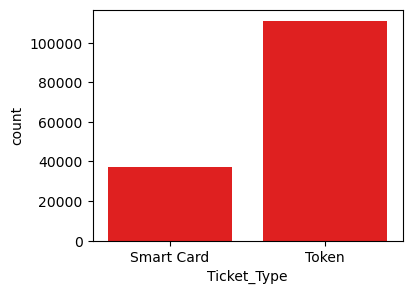

In [112]:
plt.figure(figsize = (4,3)) # customizing the size of our countplot
sns.countplot(x="Ticket_Type", data=df, color = 'red') # main function
plt.show() # It shows the chart


## Next Step

Lets Undertand Frequency of data in column -"Ticket Type"

In [113]:
# Show counts of special values
print('Ticket_Type value counts (including null values):')  
print(df['Ticket_Type'].value_counts(dropna=False))

Ticket_Type value counts (including null values):
Ticket_Type
Token         111256
Smart Card     37244
NaN             1500
Name: count, dtype: int64


## Let's check the other two columns for null values -> 'Remarks' , 'Passengers'

In [ ]:
print('Remarks blanks count: ', df['Remarks'].isnull().sum())  # It tells us the null values in 'Remarks' column if any
print('Passengers null count: ', df['Passengers'].isnull().sum()) # It tells us the null values in 'Passengers' column if any


Remarks blanks count:  26257
Passengers null count:  1500


In [ ]:
# Replace 'NA' string with actual NaN and then inspect
df['Ticket_Type'] = df['Ticket_Type'].replace('NA', np.nan)   # Replacing 'NA' with nan using np.nan from numpy library

print('Ticket_Type nulls:', df['Ticket_Type'].isna().sum())   

Ticket_Type nulls: 1500


## Let's handle missing values

In [137]:
# Option: fill missing ticket types with 'Unknown' or the mode 
mode_ticket = df['Ticket_Type'].mode(dropna=True)[0]
print('Mode ticket type:', mode_ticket)
# Let's fill the missing value with the mode 
df['Ticket_Type'] = df['Ticket_Type'].fillna(mode_ticket)
# let's check
print('\nTotal count "Ticket_Type" column now: ', df['Ticket_Type'].count())
print('\nValue count: ', df['Ticket_Type'].value_counts())
print('\nTotal null values in "Ticket_Type" column now: ', df['Ticket_Type'].isnull().sum())

Mode ticket type: Token

Total count "Ticket_Type" column now:  150000

Value count:  Ticket_Type
Token         112756
Smart Card     37244
Name: count, dtype: int64

Total null values in "Ticket_Type" column now:  0


## Let's fill the missing values in 'Remarks' column with the most suitable data

In [142]:
df['Remarks'] = df['Remarks'].replace(np.nan, 'No remarks')
print('\nRemarks nulls after conversion:', df['Remarks'].isna().sum())  
print('\nValue count: ', df['Remarks'].value_counts())
print('\nTotal values in "Remarks" column: ', df['Remarks'].count())


Remarks nulls after conversion: 0

Value count:  Remarks
No remarks     26257
off-peak       24859
festival       24812
maintenance    24771
weekend        24710
peak           24591
Name: count, dtype: int64

Total values in "Remarks" column:  150000


## Let's fill the missing values in 'Passengers' column

In [147]:
# Example: impute with median passengers
median_pass = int(df['Passengers'].median(skipna=True)) # we used median because passengers column has numerical data
print('Median passengers:', median_pass)
df['Passengers'] = df['Passengers'].fillna(median_pass)
print('\nPassengers nulls after conversion:', df['Passengers'].isna().sum())  
print('\nTotal values in "Passengers" column: ', df['Passengers'].count())

Median passengers: 20

Passengers nulls after conversion: 0

Total values in "Passengers" column:  150000


## Let's Create `Profit` column

Profit per trip = (Fare - Cost_per_passenger) * Passengers

We'll create a `Profit` column and also a `Profit_per_passenger` for analysis.

In [148]:
df['Profit_per_passenger'] = df['Fare'] - df['Cost_per_passenger']
# Profit could be negative for subsidized trips
df['Profit'] = df['Profit_per_passenger'] * df['Passengers']


print('Profit of Delhi metro total =>', round(df['Profit'].sum(), 2)) # it uses simple round method
print('Profit of Delhi metro total =>',np.round(df['Profit'].sum(), 2)) # it uses numpy round method

Profit of Delhi metro total => 127941908.48
Profit of Delhi metro total => 127941908.48


In [149]:
df.head()

,TripID,Date,From_Station,To_Station,Distance_km,Fare,Cost_per_passenger,Passengers,Ticket_Type,Remarks,Profit_per_passenger,Profit
0,59771,2022-05-08,Inderlok,Kashmere Gate,12.94,77.99,18.27,13.0,Smart Card,maintenance,59.72,776.36
1,21363,2023-01-12,Model Town,Dilshad Garden,2.33,35.89,83.71,15.0,Token,maintenance,-47.82,-717.30
2,127325,2023-07-13,Kashmere Gate,Netaji Subhash Place,5.56,64.35,43.70,9.0,Token,off-peak,20.65,185.85
3,140510,2022-11-10,Chandni Chowk,Hauz Khas,4.02,144.13,14.98,27.0,Token,maintenance,129.15,3487.05
4,144298,2022-11-06,Rajiv Chowk,Kalkaji Mandir,9.66,104.96,83.84,23.0,Token,off-peak,21.12,485.76


## Let's save this cleaned data

In [150]:
cleaned_path = 'delhi_metro_cleaned_Dataset.csv'
df.to_csv(cleaned_path, index=False)
print('Saved cleaned CSV to', cleaned_path)

Saved cleaned CSV to delhi_metro_cleaned_Dataset.csv


## lets Plot charts to explore the data

Plots included:
1. Bar chart: top 10 stations by number of trips (From_Station)
2. Box plot: Fare distribution
3. Scatter plot: Distance vs Fare
4. Pie chart: Ticket_Type share
5. Histogram: Passengers distribution
6. Line chart: Total daily profit over time


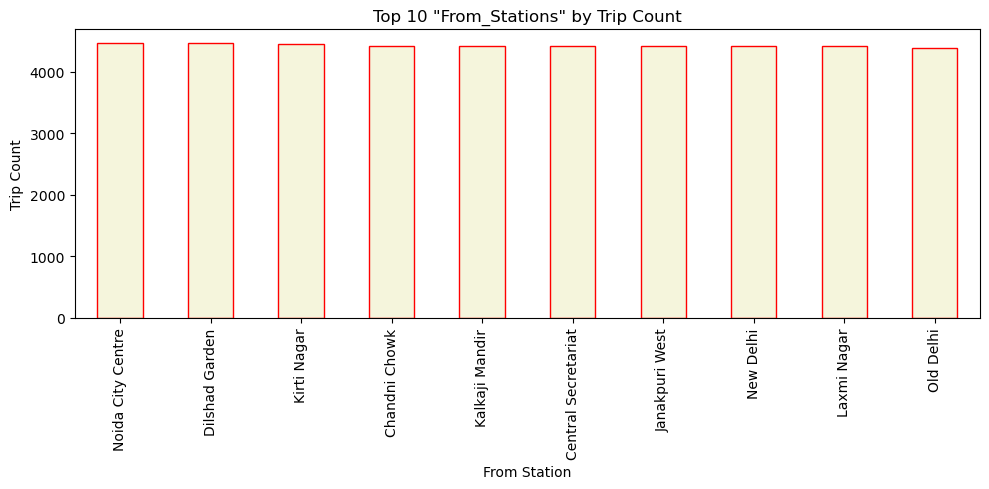

In [162]:
plt.figure(figsize=(10,5))
station_counts = df['From_Station'].value_counts().nlargest(10)
station_counts.plot(kind='bar', color = 'beige', edgecolor = 'red')
plt.title('Top 10 "From_Stations" by Trip Count')
plt.xlabel('From Station')
plt.ylabel('Trip Count')
plt.tight_layout()
plt.show()

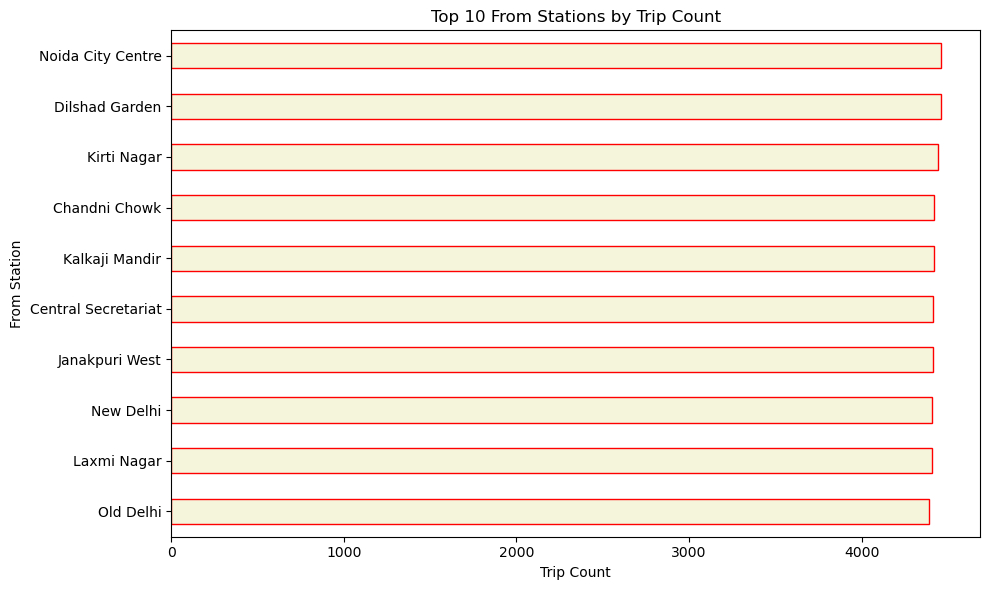

In [176]:
plt.figure(figsize=(10,6))
stations = df
station_counts = df['From_Station'].value_counts().nlargest(10)
station_counts.plot(kind='barh', color = 'beige', edgecolor = 'red')
# plt.barh(station_counts.index, station_counts.values, color = 'beige', edgecolor = 'red') # alternate
plt.title('Top 10 From Stations by Trip Count')
plt.xlabel('Trip Count')
plt.ylabel('From Station')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Total footfall

let's calculate

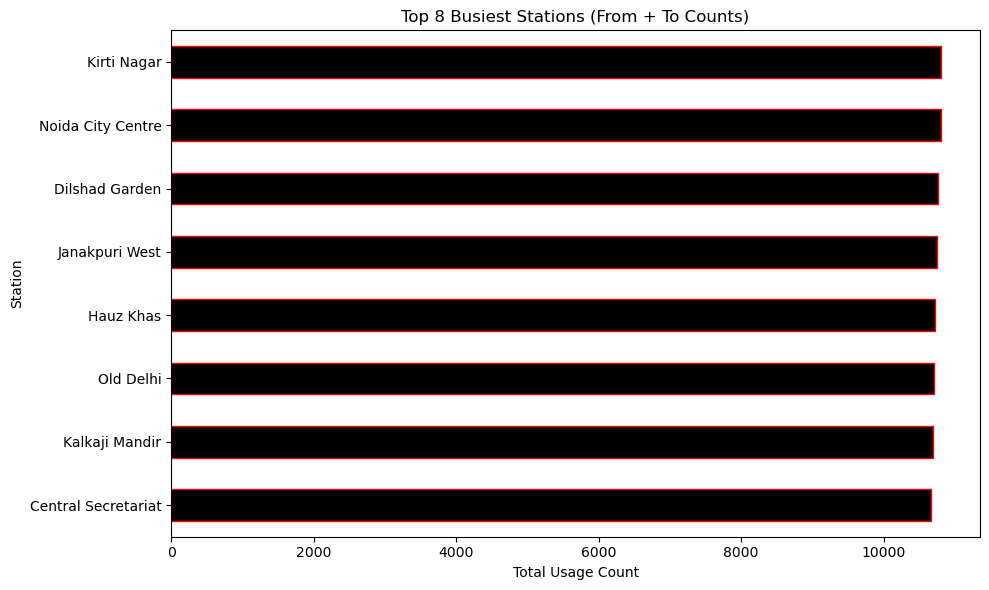

In [181]:
plt.figure(figsize=(10,6))
total_station_counts = (df['From_Station'].value_counts() + df['To_Station'].value_counts()).nlargest(8)
total_station_counts.plot(kind='barh', color = 'black', edgecolor = 'red')
plt.title('Top 8 Busiest Stations (From + To Counts)')
plt.xlabel('Total Usage Count')
plt.ylabel('Station')     
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


### Top 5 From Stations by Trip Count with color gradient

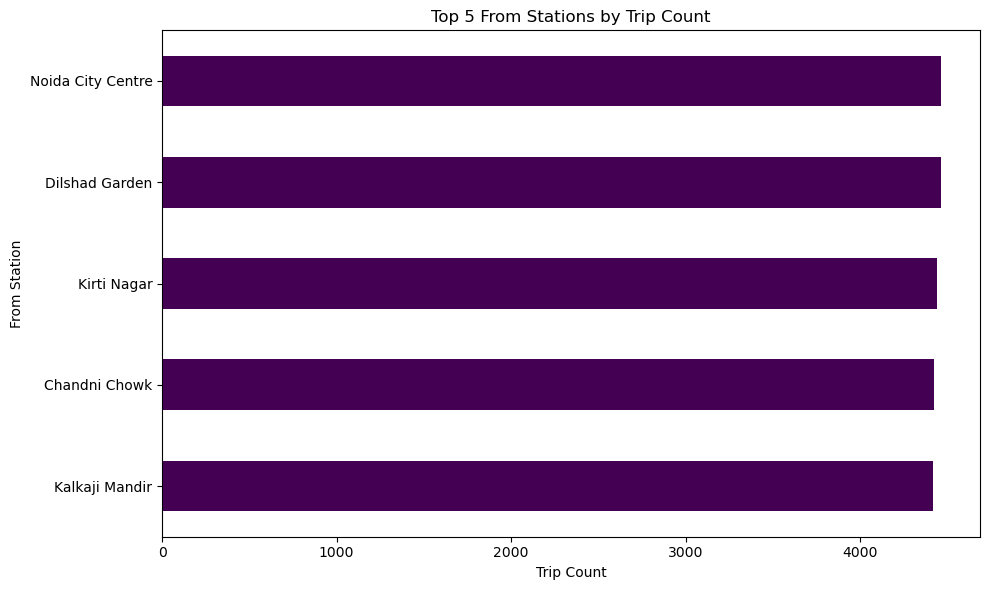

In [193]:
plt.figure(figsize=(10,6))
station_counts = df['From_Station'].value_counts().nlargest(5)
station_counts.plot(kind='barh', cmap='viridis')
plt.title('Top 5 From Stations by Trip Count')
plt.xlabel('Trip Count')
plt.ylabel('From Station')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Top 10 From Stations by % Trip Contribution

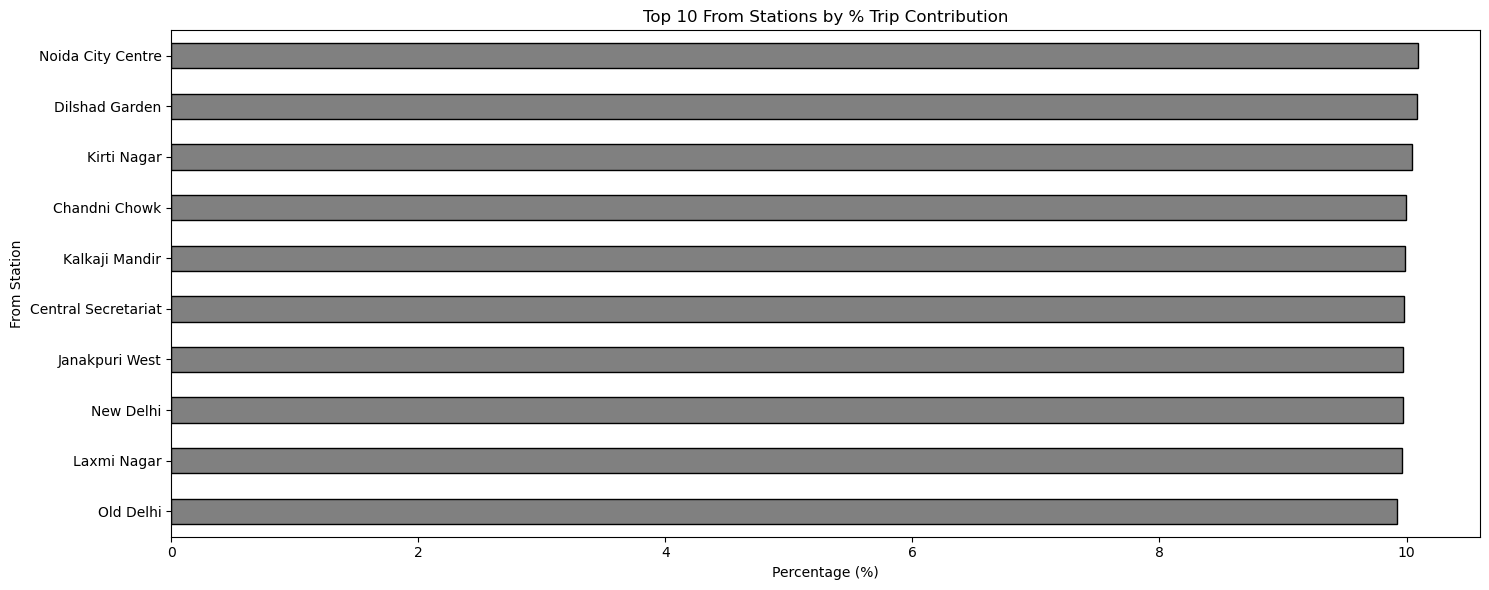

In [189]:
plt.figure(figsize=(15,6))
station_counts = df['From_Station'].value_counts().nlargest(10)
station_pct = (station_counts / station_counts.sum()) * 100
station_pct.plot(kind='barh', color = 'grey', edgecolor = 'black')
plt.title('Top 10 From Stations by % Trip Contribution')
plt.xlabel('Percentage (%)')
plt.ylabel('From Station')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Plotting all the above on a single canvas

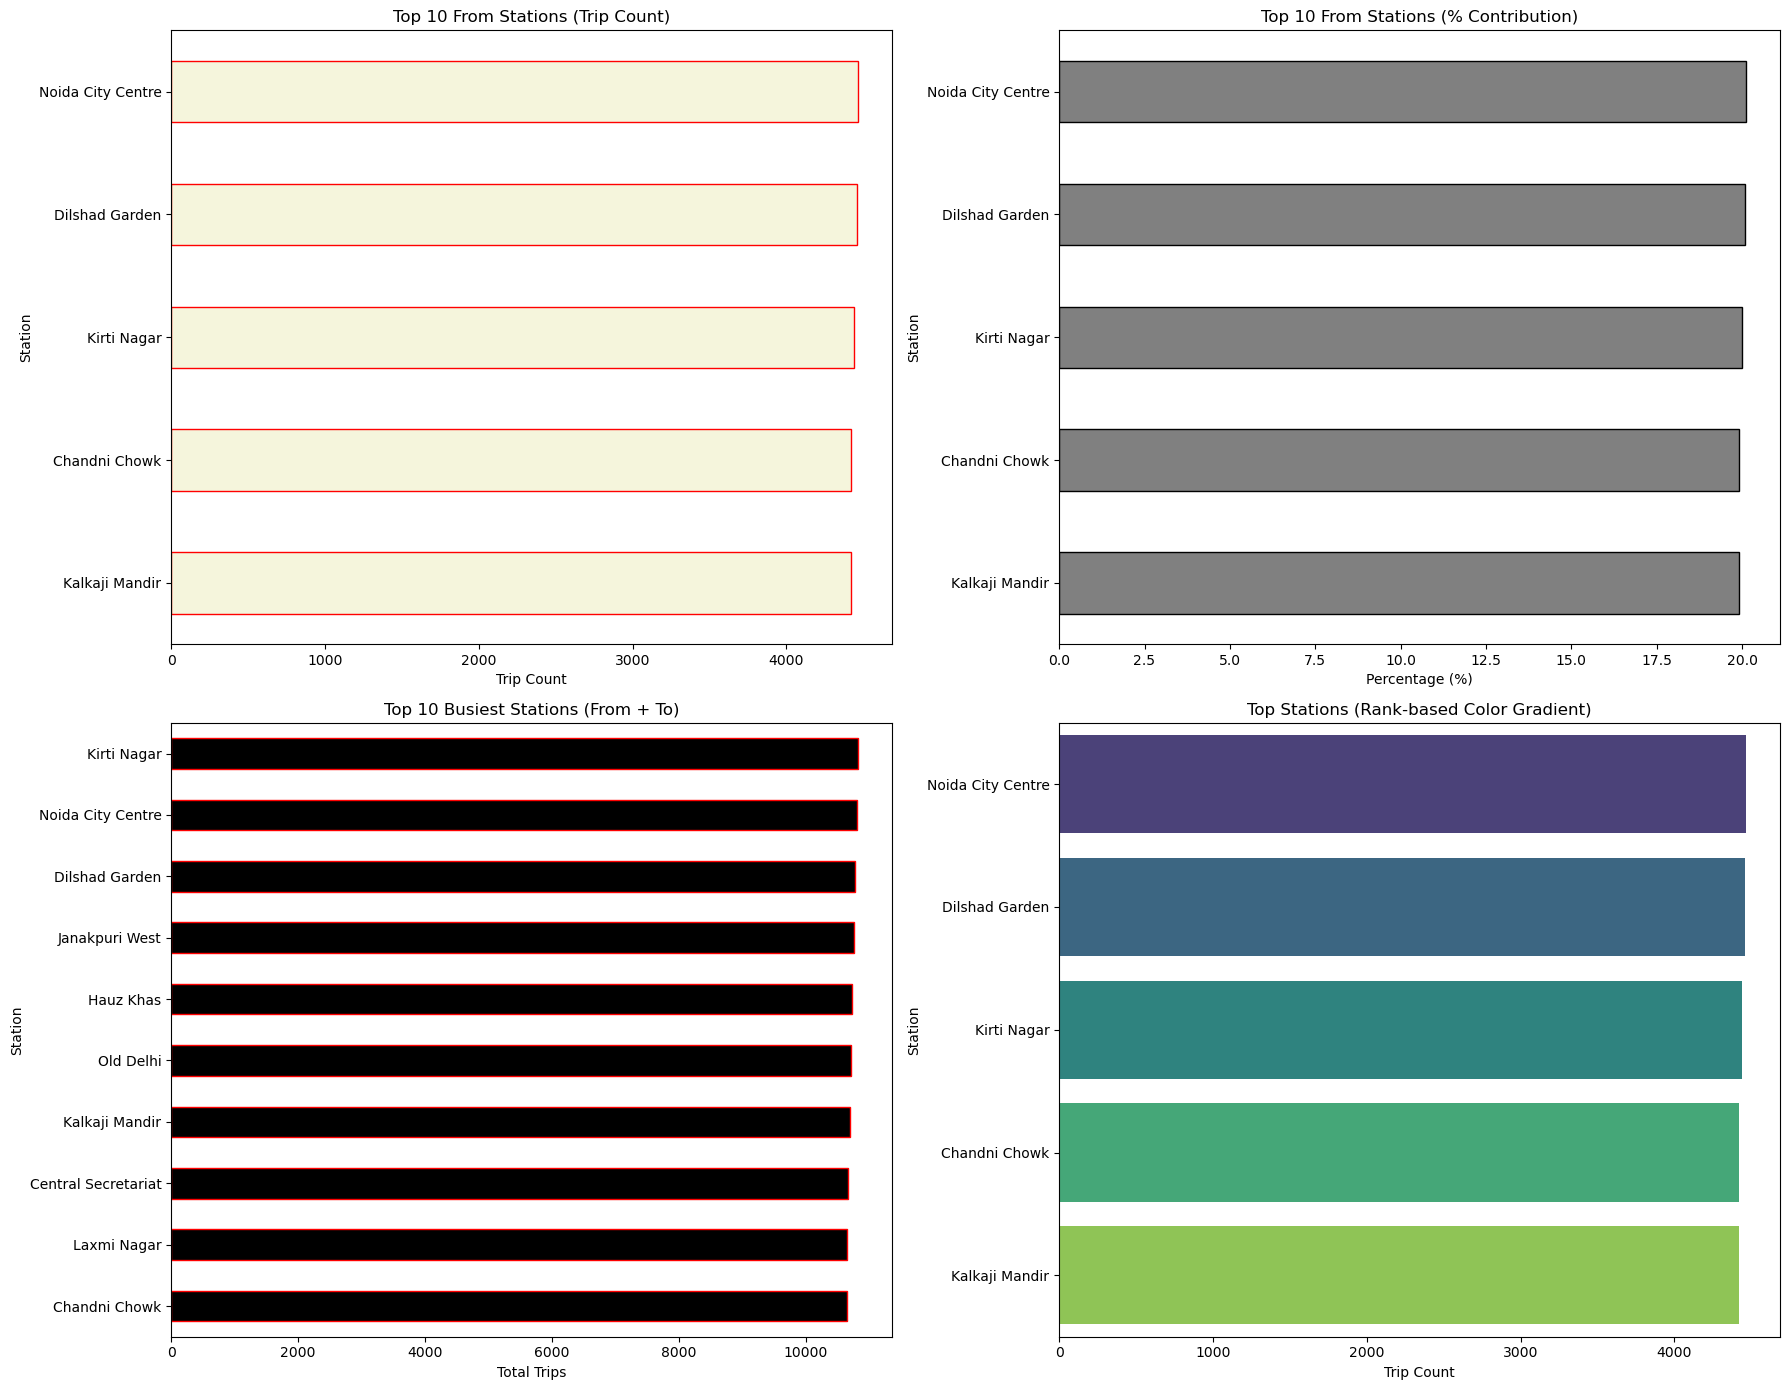

In [205]:
# Prepare data
from_counts = df['From_Station'].value_counts().nlargest(5)
from_pct = (from_counts / from_counts.sum()) * 100
total_counts = (df['From_Station'].value_counts() + df['To_Station'].value_counts()).nlargest(10)

plt.figure(figsize=(18, 14))

# Chart 1: Top 10 From Stations (Count)
plt.subplot(2, 2, 1)
from_counts.plot(kind='barh', color = 'beige', edgecolor = 'red')
plt.title('Top 10 From Stations (Trip Count)')
plt.xlabel('Trip Count')
plt.ylabel('Station')
plt.gca().invert_yaxis()

# Chart 2: Percentage Contribution
plt.subplot(2, 2, 2)
from_pct.plot(kind='barh', color = 'grey', edgecolor = 'black')
plt.title('Top 10 From Stations (% Contribution)')
plt.xlabel('Percentage (%)')
plt.ylabel('Station')
plt.gca().invert_yaxis()

# Chart 3: Total Station Usage (From + To)
plt.subplot(2, 2, 3)
total_counts.plot(kind='barh' , color = 'black', edgecolor = 'red')
plt.title('Top 10 Busiest Stations (From + To)')
plt.xlabel('Total Trips')
plt.ylabel('Station')
plt.gca().invert_yaxis()

# Chart 4: Color Gradient Bar Chart for Ranking
plt.subplot(2, 2, 4)
sns.barplot(x=from_counts.values, y=from_counts.index, hue = from_counts.index, palette='viridis')
plt.title('Top Stations (Rank-based Color Gradient)')
plt.xlabel('Trip Count')
plt.ylabel('Station')

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(8,5))
plt.boxplot(df['Fare'].dropna(), vert=False)
plt.title('Fare Distribution (boxplot)')
plt.xlabel('Fare')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df['Distance_km'], df['Fare'], alpha=0.3)
plt.title('Distance vs Fare')
plt.xlabel('Distance (km)')
plt.ylabel('Fare')
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
tt = df['Ticket_Type'].fillna('Unknown').value_counts()
plt.pie(tt, labels=tt.index, autopct='%1.1f%%')
plt.title('Ticket Type Share')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df['Passengers'], bins=30)
plt.title('Passengers Distribution')
plt.xlabel('Passengers per Trip')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
df['Date'] = pd.to_datetime(df['Date'])
daily = df.groupby('Date')['Profit'].sum().sort_index()
daily.rolling(window=7).mean().plot()
plt.title('7-day Rolling Average of Total Daily Profit')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

### Final notes

- The dataset is synthetic but realistic enough for practicing cleaning, imputation, trimming, and plotting.
- The notebook provides one example imputation (median). You can experiment with other strategies.
- Profit can be negative for trips where cost > fare, this is realistic for subsidized or low-ridership segments.


Keep practicing and exploring more and more projects
---
